In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dogs = pd.read_csv('dog.csv', sep=',')

In [4]:
dogs

,Year,Club,Position,Breed,Registrations
0,2006,UK Kennel Club,1,Labrador Retriever,45.7
1,2006,UK Kennel Club,2,English Cocker Spaniel,20.459
2,2006,UK Kennel Club,3,English Springer Spaniel,15.133
3,2006,UK Kennel Club,4,German Shepherd,12.857
4,2006,UK Kennel Club,5,Staffordshire Bull Terrier,12.729
...,...,...,...,...,...
125,2019,Club registration figures for 2024,6,Poodles,-
126,2019,Club registration figures for 2025,7,Beagles,-
127,2019,Club registration figures for 2026,8,Rottweilers,-
128,2019,Club registration figures for 2027,9,German Shorthaired Pointer,-


# Tratamento dos Dados

## 1 - Identificação e tratamento de valores ausentes/nulos (missing);

In [10]:
dogs.isnull().sum()

Year             0
Club             0
Position         0
Breed            0
Registrations    0
dtype: int64

In [4]:
'''
No dataframe em análise não foi constatado valores nulos, 
porém na coluna Registrations foi dectatado visualmente no dataFrame "-", " ", "." que ficultavam a análise. 
'''
dogs['Registrations']

0        45.7
1      20.459
2      15.133
3      12.857
4      12.729
        ...  
125         -
126         -
127         -
128         -
129         -
Name: Registrations, Length: 130, dtype: object

In [5]:
'''
Para realizar o tratamento dos dados necessarios, os metados a baixo foram utilizados para 
substituir os valores da coluna Registrations "-" para "0", retirar o espaçamento, o ponto, e por fim mudar 
o tipo do valor de objeto para inteiro
'''

dogs['Registrations'] = dogs['Registrations'].str.replace('-','0',regex=True)
dogs['Registrations'] = dogs['Registrations'].str.replace(' ','',regex=True)
dogs['Registrations'] = dogs['Registrations'].str.replace('.','',regex=True)
dogs['Registrations'] = dogs['Registrations'].astype(int)
dogs['Registrations']

0        457
1      20459
2      15133
3      12857
4      12729
       ...  
125        0
126        0
127        0
128        0
129        0
Name: Registrations, Length: 130, dtype: int32

## 2 -  Identificação e tratamento de valores atípicos (outliers);

- Outliers são valores atípicos em relação ao demais valores em um conjunto de dados, sabendo disso, para identificar nos gráficos a seguir foi utilizado o método boxplots, nele o outliers são representados como pontos além dos limites superiores e inferiores, logo os resultados dos gráficos das colunas Year, Position e Registrations não apresentaram valores anômolos ao demais valores do conjunto de dados.

<AxesSubplot: >

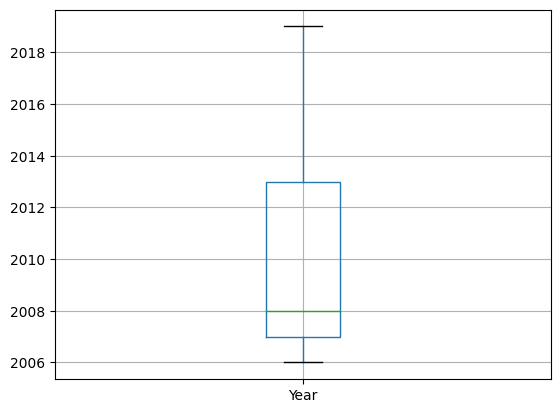

In [7]:
dogs.boxplot(column=['Year'])

<AxesSubplot: >

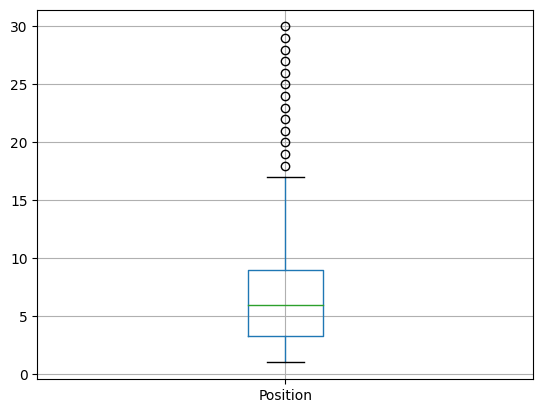

In [8]:
dogs.boxplot(column=['Position'])

<AxesSubplot: >

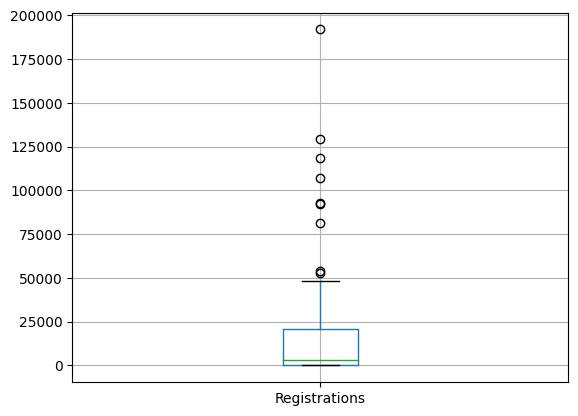

In [9]:
dogs.boxplot(column=['Registrations'])

## 3 - Tratamento em formato de dados


## 4 - Se vários datasets, identificar chaves primárias e realizar a junção (join)

- Como foi utilizado apenas um dataframe não foi necessario realizar a junção.

## 5 - Criação de novos dados para facilitar a análise (feature engineering)

- Por se tratar de um dataframe pequeno não foi necessário criar novos dados para substituir os originais

## 6 - Realizar 5 análises descritivas e gerar os respectivos gráficos


#### 1 - Qual é o Clube de cães mais popular ?

In [32]:
'''
Para ordenar a contagem do dataframe, se usa a função sort_values()
'''
grupo = dogs.groupby('Club').count().Position.sort_values()

In [33]:
grupo

Club
Club registration figures for 2024      1
Club registration figures for 2028      1
Club registration figures for 2019      1
Club registration figures for 2020      1
Club registration figures for 2021      1
Club registration figures for 2022      1
Club registration figures for 2023      1
Club registration figures for 2027      1
Club registration figures for 2025      1
Club registration figures for 2026      1
Ente Nazionale Cinofilia Italiana      10
UK Kennel Club                         10
Australian National Kennel Council     10
UK Kennel Club                         10
Canadian Kennel Club                   20
FCI Worldwide Figures                  30
American Kennel Club                   30
Name: Position, dtype: int64

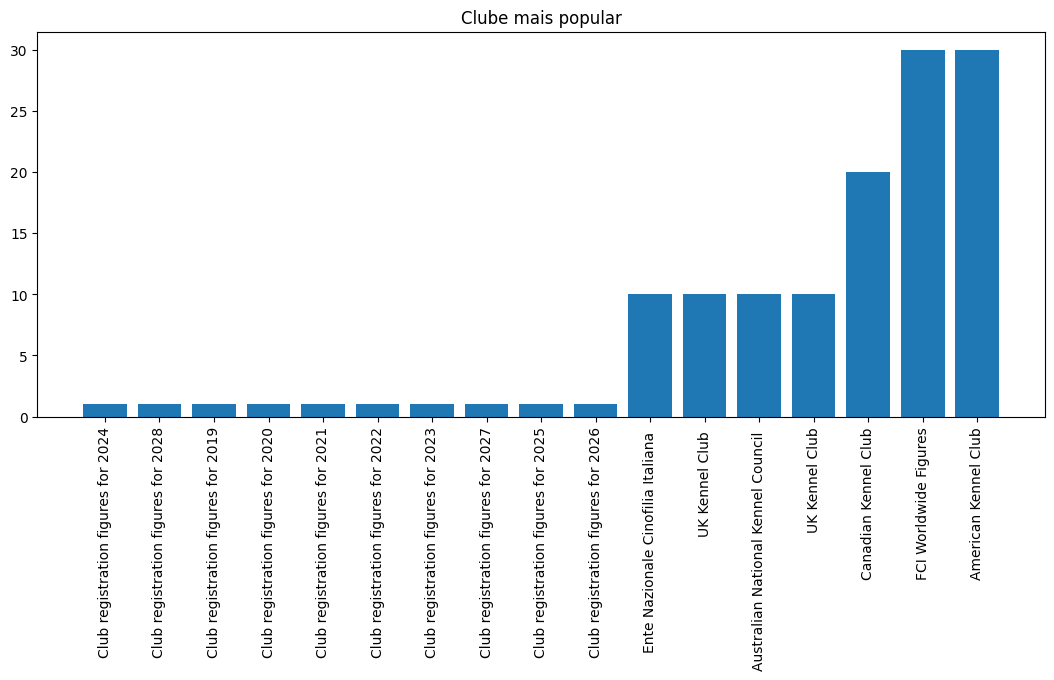

In [39]:
grupo = dogs.groupby('Club').count().Position.sort_values()

plt.figure(figsize=(13,5))
plt.bar(grupo.index,grupo.values)
plt.title('Clube mais popular')
plt.xticks(rotation=90)
plt.show()

#### 2 - Qual é a relação entre o ano e a quantidade de registros?



#### 3 - Qual é a relação entre o clube de cães e a quantidade de registros?




#### 4 - Qual é a relação entre a raça e a posição?



#### 5 - Qual é a distribuição de registros por posição?